Introdueix el correu del client:  johndoe@gmail.com


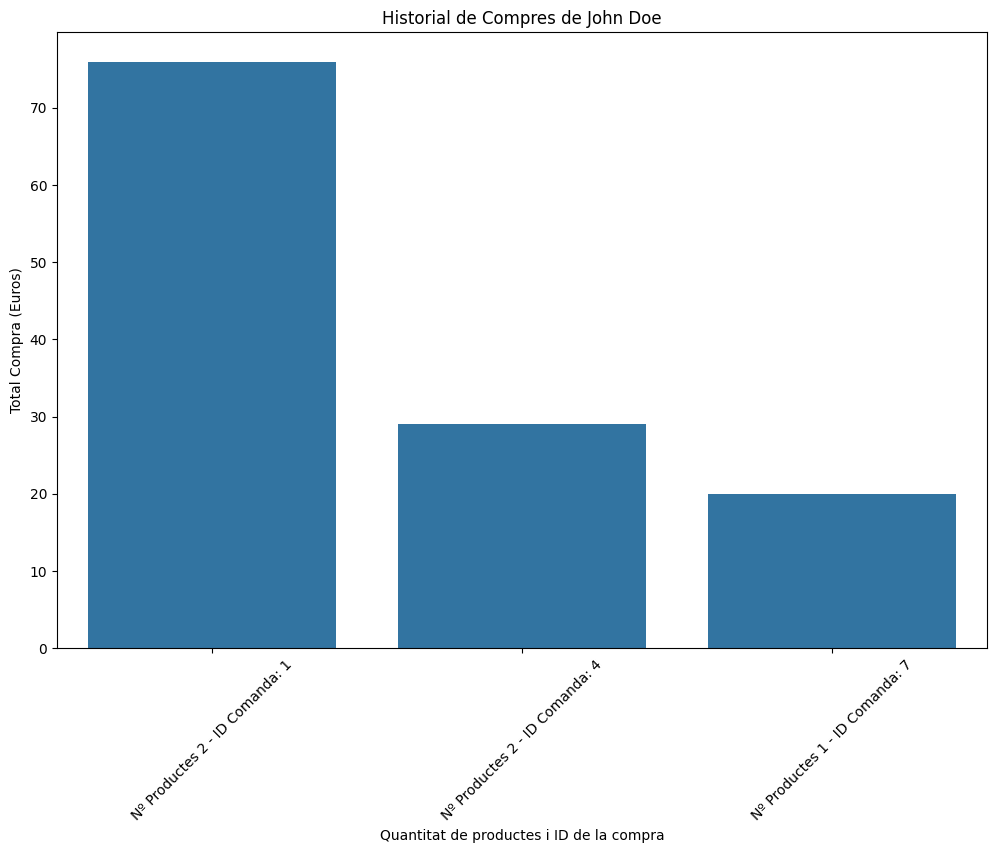

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configurar los logs
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Configurar la URL base del servidor
BASE_URL = "http://name.tr1-g5.dam.inspedralbes.cat:21787"  # Reemplaza <port> con el puerto correcto donde corre tu servidor

def visualizar_historial_ventas(email_client):
    """
    Obtiene el historial de ventas de un cliente y muestra un gráfico de barras con los detalles de cada venta.
    """
    # Obtener todos los usuarios para encontrar el ID del cliente
    response = requests.get(f"{BASE_URL}/user")
    if response.status_code != 200:
        logging.error("Error al obtenir la llista d'usuaris.")
        return
    
    # Convertir la respuesta en un DataFrame y buscar el usuario por correo
    users = response.json()
    user_df = pd.DataFrame(users)
    
    client = user_df[user_df['email'] == email_client]
    
    if client.empty:
        logging.warning(f"No s'ha trobat un usuari amb aquest correu electrónic: {email_client}")
        return
    
    # Obtener el nombre completo del cliente combinando 'firstName' y 'lastName'
    if 'firstName' in client.columns and 'lastName' in client.columns:
        full_name = f"{client['firstName'].values[0]} {client['lastName'].values[0]}"
    else:
        logging.warning("No s'ha trobat el nom complet del client.")
        return
    
    user_id = client['id'].values[0]
    
    # Obtener el historial de ventas del cliente usando su ID
    response = requests.get(f"{BASE_URL}/ordersUser/{user_id}")
    if response.status_code != 200:
        logging.error("Error al obtenir l'historial de compres del client.")
        return
    
    # Convertir las ventas a DataFrame
    ordersClient = response.json()
    
    if not ordersClient:
        logging.warning(f"L'usuari {full_name} no ha realitzat compres.")
        return
    
    # Crear una lista de descripciones de productos para cada venta
    data = []
    for order in ordersClient:
        data.append({
            'ID': order['id'],  # ID de la venta
            'Total': float(order['total']),  
            'NumProductes': f"Nº Productes {order['productCount']} - ID Comanda: {order['id']}"  # Nombre del producto con ID de la venta
        })
    
    # Crear un DataFrame con la información extraída
    df_orders = pd.DataFrame(data)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_orders, x='NumProductes', y='Total')   
    
    # Añadir el título y las etiquetas con el nombre completo del cliente
    ax.set_title(f"Historial de Compres de {full_name}")
    ax.set_xlabel("Quantitat de productes i ID de la compra")
    ax.set_ylabel("Total Compra (Euros)")
    plt.xticks(rotation=45)
    plt.show()

# Ejemplo de uso:
email_client = input("Introdueix el correu del client: ")
visualizar_historial_ventas(email_client)
